# 1. Environment Preparation

In [ ]:
%pip install torch==1.11.0+cu102 torchvision==0.12.0+cu102 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu102

In [ ]:
import torch, torchvision

print(torch.__file__)
print(torch.__version__)
print(torchvision.__version__)
print(torch.version.cuda)

In [ ]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

In [ ]:
%cd GroundingDINO
%pip install -e .

In [ ]:
%mkdir weights
%cd weights
!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

In [ ]:
%cd ..
%cd ..

In [ ]:
%ls -lrt

In [ ]:
!pwd

In [ ]:
import sys
sys.path.append("/mnt/batch/tasks/shared/LS_root/mounts/clusters/guotiantian1/code/Users/guotiantian/safety")

## 1.1 Test GroundingDino

In [ ]:
# from GroundingDINO.groundingdino.util.inference import load_model, load_image, predict, annotate
# import cv2

# model = load_model("GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py", "./GroundingDINO/weights/groundingdino_swint_ogc.pth")

# IMAGE_PATH = "data/man_in_hemlet.jpg"
# TEXT_PROMPT = "hemlet"
# BOX_TRESHOLD = 0.35
# TEXT_TRESHOLD = 0.25

# image_source, image = load_image(IMAGE_PATH)

# boxes, logits, phrases = predict(
#     model=model,
#     image=image,
#     caption=TEXT_PROMPT,
#     box_threshold=BOX_TRESHOLD,
#     text_threshold=TEXT_TRESHOLD
# )

# annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
# cv2.imwrite("output.jpg", annotated_frame)

# 2. Prompt for ChatGPT to generate Prompts for image generation

#### To generate images that person wear helmet

Input:

I have to generate an image dataset for a human wear safety helmet detection model 
with stable diffusion. Give me 30 different prompts to obtain images 
of different situations like construction site, High voltage electricity site that helmet correctly worn by workers in different environments and poses. Your response must be only in the form of a python list of strings.  Add the string ",  photo , 4k, high resolution" at the end of each string

Output:

Prompts = [
    "Construction worker wearing safety helmet at a construction site, photo, 4k, high resolution",\
    "Electrician wearing safety helmet at a high voltage electricity site, photo, 4k, high resolution",\
    "Factory worker wearing safety helmet on the production floor, photo, 4k, high resolution",\
    "Miner wearing safety helmet in a mine shaft, photo, 4k, high resolution",\
    "Firefighter wearing safety helmet at the scene of a fire, photo, 4k, high resolution",\
    "Forestry worker wearing safety helmet in a forest, photo, 4k, high resolution",\
    "Scaffolder wearing safety helmet on scaffolding, photo, 4k, high resolution",\
    "Oil rig worker wearing safety helmet on an offshore platform, photo, 4k, high resolution"\
    "Railway worker wearing safety helmet on railroad tracks, photo, 4k, high resolution",\
    "Road construction worker wearing safety helmet on a highway, photo, 4k, high resolution",\
    "Dock worker wearing safety helmet in a shipping yard, photo, 4k, high resolution",\
    ...
]

#### To generate images that person without wearing helmet

Input:

I have to generate an image dataset for human detection model 
with stable diffusion. Give me 30 different prompts to obtain images 
of different situations that human in different environments and poses. Your response must be only in the form of a python list of strings.  Add the string ",  photo , 4k, high resolution" at the end of each string

Output:

prompts = [
    "A person walking in a busy city street, photo, 4k, high resolution",\
    "A group of people playing soccer in a park, photo, 4k, high resolution",\
    "A person riding a bicycle on a mountain trail, photo, 4k, high resolution",\
    "A woman jogging along a beach at sunrise, photo, 4k, high resolution",\
    "A man sitting on a bench in a crowded train station, photo, 4k, high resolution",\
    "A group of friends hiking in a forest, photo, 4k, high resolution",\
    "A person doing yoga in a serene garden, photo, 4k, high resolution",\
    "A couple dancing at a wedding reception, photo, 4k, high resolution",\
    "A person rock climbing on a cliff, photo, 4k, high resolution",\
    "A group of students studying in a library, photo, 4k, high resolution",\
    "A person skateboarding in an urban plaza, photo, 4k, high resolution",\
    "A chef cooking in a busy restaurant kitchen, photo, 4k, high resolution",\
    "A woman meditating in a peaceful meadow, photo, 4k, high resolution",\
    ...]

# 3. Image Generation

In [3]:
from diffusers import DiffusionPipeline
import torch
import numpy as np
from PIL import Image

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sd_pipe = DiffusionPipeline.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0",
    torch_dtype=torch.float16,
    use_safetensors=True
).to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]


In [ ]:
chatgpt_prompts = [
    "A group of workers working on scaffolding, some wearing safety helmets and others not, at a construction site",
    "Workers operating heavy machinery in a construction zone, some with helmets and some without, amidst debris and equipment, photo, 4k, high resolution",
    "Construction workers assembling a structure, with some wearing helmets while others are without, amidst steel beams and concrete, photo, 4k, high resolution",
    "Workers on a high-voltage electricity site, performing maintenance tasks, some with safety helmets and others without, surrounded by power lines and transformers, photo, 4k, high resolution",
    "A team of workers inspecting electrical equipment, some wearing helmets and others not, in a high-voltage substation, photo, 4k, high resolution",
    "Construction workers at a building site, some wearing helmets while others are not, lifting heavy materials, photo, 4k, high resolution",
    "Workers on a construction site, some wearing helmets and others without, pouring concrete for a foundation, photo, 4k, high resolution",
    "A group of workers working on road construction, some with helmets and others without, amidst heavy machinery and traffic, photo, 4k, high resolution",
    "Construction workers assembling scaffolding, some wearing helmets while others are not, against the backdrop of a partially constructed building, photo, 4k, high resolution",
    "Workers on a high-rise construction site, some wearing helmets and others without, installing windows on a skyscraper, photo, 4k, high resolution",
    "Electricians working on power lines, some with helmets and others without, in an urban area, photo, 4k, high resolution",
    "Construction workers operating cranes, some wearing helmets and others not, at a building site, photo, 4k, high resolution",
    "Workers repairing a bridge, some with helmets and others without, amidst scaffolding and heavy machinery, photo, 4k, high resolution",
    "A team of workers assembling prefabricated components, some wearing helmets while others are not, at a construction site, photo, 4k, high resolution",
    "Construction workers excavating a site, some with helmets and others without, using heavy equipment like excavators and bulldozers, photo, 4k, high resolution",
    "Workers on a railway construction site, some wearing helmets and others not, laying tracks, photo, 4k, high resolution",
    "Electricians installing cables, some with helmets and others without, in an industrial setting, photo, 4k, high resolution",
    "A group of workers constructing a new building, some wearing helmets while others are not, amidst scaffolding and cranes, photo, 4k, high resolution",
    "Construction workers demolishing a structure, some with helmets and others without, using heavy machinery, photo, 4k, high resolution",
    "Workers assembling wind turbines at a wind farm, some wearing helmets and others not, photo, 4k, high resolution",
    "A team of workers performing maintenance on a factory roof, some with helmets and others without, amidst industrial equipment, photo, 4k, high resolution",
    "Construction workers pouring concrete on a bridge, some wearing helmets and others not, photo, 4k, high resolution",
    "Workers on an oil rig, some with helmets and others without, conducting maintenance tasks, photo, 4k, high resolution",
    "A group of electricians installing solar panels on a rooftop, some wearing helmets while others are not, photo, 4k, high resolution",
    "Construction workers welding metal structures, some with helmets and others without, amidst sparks and equipment, photo, 4k, high resolution",
    "Workers on a dockyard, some with helmets and others without, loading cargo onto ships, photo, 4k, high resolution",
    "A team of construction workers laying bricks, some wearing helmets and others not, at a building site, photo, 4k, high resolution",
    "Workers assembling machinery in a factory, some with helmets and others without, amidst conveyor belts and industrial equipment, photo, 4k, high resolution",
    "Construction workers installing pipes, some wearing helmets and others not, in a trench, photo, 4k, high resolution",
    "A group of workers assembling a steel frame structure, some with helmets and others without, amidst cranes and welding equipment, photo, 4k, high resolution"
]

Note: need to change value of j to control batch of images with or without helmet (positive or negative cases) while change chatgpt_prompt

In [ ]:
# 

negative_prompt="low resolution, ugly, naked, nude"
num_batches = len(chatgpt_prompts)
num_images_per_batch = 8

generated_images = []

j = 0
for i in range(num_batches):
    batch = sd_pipe(prompt=chatgpt_prompts[i],
                  negative_prompt=negative_prompt,
                  num_images_per_prompt=num_images_per_batch,
                    height=416,
                    width=416)
    for batch_image in batch.images:
        generated_images.append(np.array(batch_image))
        
        image_name = "data/generated_image/img_" + str(j) + ".png"
        im = Image.fromarray(np.array(batch_image))
        im.save(image_name)
        j = j + 1

In [ ]:
len(generated_images)

In [3]:
import cv2
import os
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
import glob

generated_images = []
for img in glob.glob("data/generated_image/*"):
    
    image = np.asarray(Image.open(img))
    generated_images.append(image)

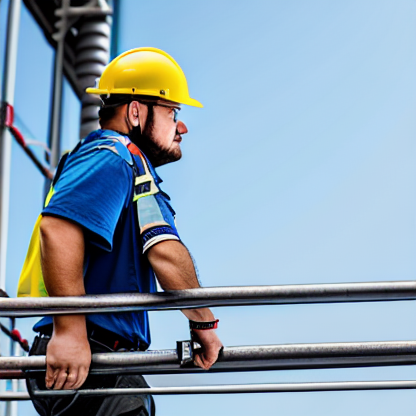

In [5]:
test_img = generated_images[211]
Image.fromarray(test_img)

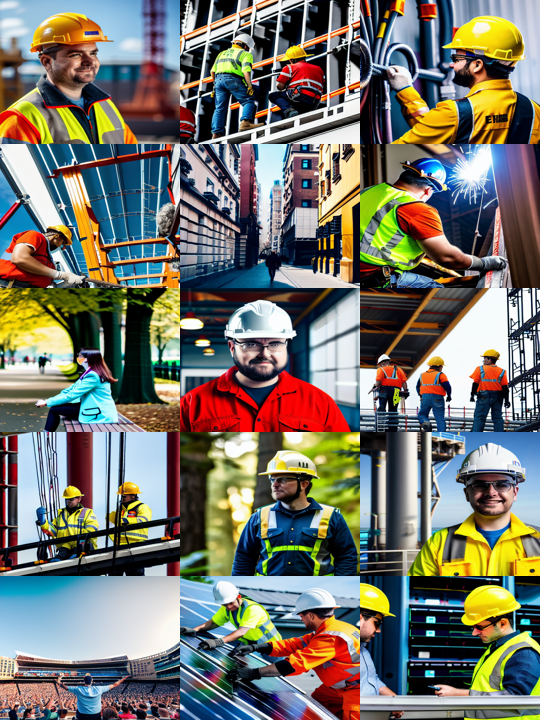

In [6]:
def mosaic_sample(list_of_arrays, nrows=5, ncols=8):
    random_choose = np.arange(0,len(list_of_arrays), 1)
    np.random.shuffle(random_choose)
    random_choose = random_choose[:nrows*ncols]
    out_w, out_h = 540, 720
    d_w, d_h = out_w//ncols, out_h//nrows
    out = np.zeros((out_h, out_w, 3), dtype=np.uint8)
    row = 0
    col = 0
    for choose in random_choose:
        choosen_image = Image.fromarray(list_of_arrays[choose]
                                        ).resize((d_w, d_h))
        out[row*d_h:row*d_h + d_h, 
            col*d_w:col*d_w + d_w, 
            :] = np.array(choosen_image)
        row += 1
        if row == nrows:
            row = 0
            col += 1
    return out

Image.fromarray(mosaic_sample(generated_images, nrows=5, ncols=3))

# 4. Image Auto Labeling

In [6]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), "GroundingDINO"))
from torchvision.ops import box_convert
import GroundingDINO.groundingdino.datasets.transforms as T
from GroundingDINO.groundingdino.models import build_model
from GroundingDINO.groundingdino.util import box_ops
from GroundingDINO.groundingdino.util.slconfig import SLConfig
from GroundingDINO.groundingdino.util.utils import (clean_state_dict, 
                                                  get_phrases_from_posmap)
from GroundingDINO.groundingdino.util.inference import (annotate, 
                                                        load_image, 
                                                         predict)
from huggingface_hub import hf_hub_download

In [7]:
import base64, os
import requests
import io

In [8]:
# Helper functions

def load_model_hf(repo_id, filename, ckpt_config_filename, device='cpu'):
    cache_config_file = hf_hub_download(repo_id=repo_id, 
                                    filename=ckpt_config_filename)

    args = SLConfig.fromfile(cache_config_file)
    args.device = device
    model = build_model(args)

    cache_file = hf_hub_download(repo_id=repo_id, filename=filename)
    checkpoint = torch.load(cache_file, map_location=device)
    log = model.load_state_dict(clean_state_dict(checkpoint['model']), 
                                                        strict=False)
    print("Model loaded from {} \n => {}".format(cache_file, log))
    _ = model.eval()
    return model

In [13]:
# import glob
# for i in glob.glob("data/yolo_dataset/train/images/*"):
#     os.remove(i)
    
# for i in glob.glob("data/yolo_dataset/train/labels/*"):
#     os.remove(i)
    
# for i in glob.glob("data/yolo_dataset/test/images/*"):
#     os.remove(i)
    
# for i in glob.glob("data/yolo_dataset/test/labels/*"):
#     os.remove(i)
    
# for i in glob.glob("data/yolo_dataset/valid/images/*"):
#     os.remove(i)
    
# for i in glob.glob("data/yolo_dataset/valid/labels/*"):
#     os.remove(i)

In [9]:
api_key = os.getenv("OPENAI_API_KEY")
# detect object using grounding DINO

def gpt_label(img, boxes, logits, phrases):
    img_width = np.array(img).shape[0]
    img_height = np.array(img).shape[1]
    
    if len(np.array(boxes)) > 0:
        for i in range(len(np.array(boxes))):
            x_center, y_center, width, height = np.array(boxes)[i][0], np.array(boxes)[i][1], np.array(boxes)[i][2], np.array(boxes)[i][3]
            # Convert normalized coordinates [0, 1] back to pixel values.
            x_center = x_center * img_width
            y_center = y_center * img_height
            width = width * img_width
            height = height * img_height

            # Calculate the top-left (x1, y1) and bottom-right (x2, y2) coordinates of the box.
            x1 = x_center - (width / 2)
            y1 = y_center - (height / 2)
            x2 = x_center + (width / 2)
            y2 = y_center + (height / 2)

            b = io.BytesIO()
            cropImg=Image.fromarray(img).crop((x1, y1, x2, y2))
            cropImg.save(b, 'jpeg')
            base64_cropImg = base64.b64encode(b.getvalue()).decode('utf-8')

            headers = {
              "Content-Type": "application/json",
              "Authorization": f"Bearer {api_key}"
            }

            payload = {
              "model": "gpt-4-vision-preview",
              "messages": [
                {
                  "role": "user",
                  "content": [
                    {
                      "type": "text",
                      "text": "if person wear helmet, return yes, else return no"
                    },
                    {
                      "type": "image_url",
                      "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_cropImg}"
                      }
                    }
                  ]
                }
              ],
              "max_tokens": 300
            }

            response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
            if len(response.json()) > 1:
                output = response.json()['choices'][0]['message']['content']
                if output == "Yes":
                    phrases[i] = "Positive"
                else:
                    phrases[i] = "Negative"
            else:
                phrases[i] = "Negative"
    return phrases

def detect(img, image_source, image_preprocessed, text_prompt, model, 
                    box_threshold = 0.35, text_threshold = 0.25):
    boxes, logits, phrases = predict(model=model, image=image_preprocessed, caption=text_prompt, box_threshold=box_threshold, text_threshold=text_threshold)
    
    phrases = gpt_label(img, boxes, logits, phrases)
    
    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
    annotated_frame = annotated_frame[...,::-1] # BGR to RGB
    return annotated_frame, boxes, phrases

In [10]:
def preprocess_image(pil_image):
    # image preprocess for groundingDINO model
    image = np.array(pil_image)
    transform = T.Compose(
        [
            T.ToTensor(),
            T.Normalize([0.485, 0.456, 0.406], 
                        [0.229, 0.224, 0.225]),
        ]
    )
    image_transformed, _ = transform(pil_image, None)
    return image, image_transformed

# loading model 

ckpt_repo_id = "ShilongLiu/GroundingDINO"
ckpt_filenmae = "groundingdino_swinb_cogcoor.pth"
ckpt_config_filename = "GroundingDINO_SwinB.cfg.py"

In [11]:
groundingdino_model = load_model_hf(ckpt_repo_id, 
                                    ckpt_filenmae, 
                                    ckpt_config_filename, 
                                    device)

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/azureuser/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
# # test boxes
# image_source, image_preprocessed = preprocess_image(test_img)
# annotated_frame, detected_boxes, phrases = detect(test_img, image_source,image_preprocessed,text_prompt="person", model=groundingdino_model, box_threshold = 0.35, text_threshold = 0.25)
# #Image.fromarray(annotated_frame)

# with open(f"./data/yolo_dataset/train/labels/test.txt", "w+") as file:
#     for b in range(len(boxes)):
#         if phrases[b] == "Negative":
#             body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
#         elif phrases[b] == "Positive":
#             body = "\n".join(["1\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
#         else:
#             body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
#         file.write(body)
# file.close()

In [12]:
annotated_images = []
source_images = []
preprocessed_images = []
annotations = []
annnotated_frames = []

# mark negative images: this prevents from making boxes
# man_in_helmet = np.ones(len(generated_images))
# man_in_helmet[913:] = 0

no_of_images = len(generated_images)

# train/valid/test split (random choose) 80% / 10% / 10%

images_ids = np.arange(0,len(generated_images), 1)
np.random.shuffle(images_ids)
train_ids = images_ids[:int(len(images_ids)*0.8)]
valid_ids = images_ids[int(len(images_ids)*0.8):int(len(images_ids)*0.9)]
test_ids = images_ids[int(len(images_ids)*0.9):]

In [ ]:
len(generated_images)

# 5.Dataset Preparation

In [ ]:
for i, pil_image in enumerate(generated_images):
    image_source, image_preprocessed = preprocess_image(pil_image)
    # source_images.append(image_source)
    # preprocessed_images.append(image_preprocessed)

    # detect person with helmet and save as yolo dataset format
    annotated_frame, detected_boxes, phrases = detect(pil_image,image_source,image_preprocessed,text_prompt="person", model=groundingdino_model, box_threshold = 0.3, text_threshold = 0.25)
    print(i)
    if len(phrases) == 0:
        # negative images does not have bounding boxes
        annotated_images = image_source
        annotations = torch.empty((0,4))
    else:
        # positive images
        annotated_images = annotated_frame
        annotations = detected_boxes

    if i in train_ids:
        original_image = pil_image
        # saving to train/images folder
        Image.fromarray(original_image).save(
                  f"./data/yolo_dataset/train/images/{i}.png")
        # saving boxes annotations in yolo format (class x y width height) 
        # to train/labels
        boxes = annotations.numpy().tolist()

        with open(f"./data/yolo_dataset/train/labels/{i}.txt", "w+") as file:
            for b in range(len(boxes)):
                if phrases[b] == "Negative":
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                elif phrases[b] == "Positive":
                    body = "\n".join(["1\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                else:
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                file.write(body)
        file.close()

    if i in valid_ids:
        original_image = pil_image
        # saving to valid/images folder
        Image.fromarray(original_image).save(
                    f"./data/yolo_dataset/valid/images/{i}.png")
        # saving boxes annotations in yolo format (class x y width height) 
        # to train/labels
        boxes = annotations.numpy().tolist()

        with open(f"./data/yolo_dataset/valid/labels/{i}.txt", "w+") as file:
            for b in range(len(boxes)):
                if phrases[b] == "Negative":
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                elif phrases[b] == "Positive":
                    body = "\n".join(["1\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                else:
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                file.write(body)
        file.close()

    if i in test_ids:
        original_image = pil_image
        # saving to train/images folder
        Image.fromarray(original_image).save(
                     f"./data/yolo_dataset/test/images/{i}.png")
        # saving boxes annotations in yolo format (class x y width height) 
        # to train/labels
        boxes = annotations.numpy().tolist()
        with open(f"./data/yolo_dataset/test/labels/{i}.txt", "w+") as file:
            for b in range(len(boxes)):
                if phrases[b] == "Negative":
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                elif phrases[b] == "Positive":
                    body = "\n".join(["1\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                else:
                    body = "\n".join(["0\t"+"\t".join([str(coord) for coord in boxes[b]])]) + "\n"
                file.write(body)
        file.close()

In [ ]:
#Image.fromarray(np.array(annotated_frame))

In [ ]:
def mosaic_sample(list_of_arrays, nrows=5, ncols=8):
    random_choose = np.arange(0,len(list_of_arrays), 1)
    np.random.shuffle(random_choose)
    random_choose = random_choose[:nrows*ncols]
    out_w, out_h = 1048, 826
    d_w, d_h = out_w//ncols, out_h//nrows
    out = np.zeros((out_h, out_w, 3), dtype=np.uint8)
    row = 0
    col = 0
    for choose in random_choose:
        choosen_image = Image.fromarray(list_of_arrays[choose]
                                        ).resize((d_w, d_h))
        out[row*d_h:row*d_h + d_h, 
            col*d_w:col*d_w + d_w, 
            :] = np.array(choosen_image)
        row += 1
        if row == nrows:
            row = 0
            col += 1
    return out

Image.fromarray(mosaic_sample(annotated_images, nrows=3, ncols=3))

In [ ]:
# !mkdir data/yolo_dataset
# !mkdir data/yolo_dataset/train
# !mkdir data/yolo_dataset/train/images
# !mkdir data/yolo_dataset/train/labels
# !mkdir data/yolo_dataset/valid
# !mkdir data/yolo_dataset/valid/images
# !mkdir data/yolo_dataset/valid/labels
# !mkdir data/yolo_dataset/test
# !mkdir data/yolo_dataset/test/images
# !mkdir data/yolo_dataset/test/labels

In [ ]:
len(generated_images)

In [ ]:
generated_images[0].shape

In [ ]:
%pip install ultralytics

In [ ]:
from ultralytics import YOLO

detection_model = YOLO("yolov8n.pt")

training_results = detection_model.train(data="data/yolo_dataset.yaml", 
                                         imgsz=416, 
                                         batch=128,
                                         epochs=120)

In [ ]:
import gc

gc.collect()

In [ ]:
import torch

torch.cuda.empty_cache()

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

from ultralytics.utils.checks import check_imshow
from ultralytics.utils.plotting import Annotator, colors

from collections import defaultdict

track_history = defaultdict(lambda: [])
model = YOLO("runs/detect/train5/weights/best.pt")

In [ ]:
source = "data/worker3.mp4"
model.predict(source, save=False, imgsz=416, conf=0.4)

In [ ]:
while cap.isOpened():
    success, frame = cap.read()
    if success:
        results = model.track(frame, persist=True, verbose=False)
        boxes = results[0].boxes.xyxy.cpu()

        if results[0].boxes.id is not None:

            # Extract prediction results
            clss = results[0].boxes.cls.cpu().tolist()
            track_ids = results[0].boxes.id.int().cpu().tolist()
            confs = results[0].boxes.conf.float().cpu().tolist()

            # Annotator Init
            annotator = Annotator(frame, line_width=2)

            for box, cls, track_id in zip(boxes, clss, track_ids):
                annotator.box_label(box, color=colors(int(cls), True), label=names[int(cls)])

                # Store tracking history
                track = track_history[track_id]
                track.append((int((box[0] + box[2]) / 2), int((box[1] + box[3]) / 2)))
                if len(track) > 30:
                    track.pop(0)

                # Plot tracks
                points = np.array(track, dtype=np.int32).reshape((-1, 1, 2))
                cv2.circle(frame, (track[-1]), 7, colors(int(cls), True), -1)
                cv2.polylines(frame, [points], isClosed=False, color=colors(int(cls), True), thickness=2)

        result.write(frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

result.release()
cap.release()
cv2.destroyAllWindows()